# Práctica 2

## Programación del descenso de gradiente para el caso de una regresión logística.

### Autor: Marcos Barragán Corredera

### Fecha: 13/11/2020

### Objetivo: 

Se pretende llevar a cabo un algoritmo que programación del descenso de gradiente para el caso de una regresión logística, en base a un archivo de datos facilitados por el profesor. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Cargamos los datos necesarios para la realización de la práctica y echamos un primer vistazo sobre ellos a través del comando _head_:

In [479]:
datos = pd.read_csv('./4_1_data.csv')

datos.head()

,score-1,score-2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Tenemos que crear las matrices con los datos de x e y. Para ello, utilizaremos los datos de la primera y la segunda columna de los datos que hemos cargado (`score 1`, `score 2`) como variable x, y los valores de la columna `label` como variable y.

In [4]:
x = datos.iloc[:, : -1].values
y = datos.iloc[:, -1].values

Escalamos los datos de los que disponemos y los normalizamos a través de la media y la desviación estándar: 

In [7]:
media_x = np.mean(x, axis=0)

sd_x = np.std(x, axis=0)

x = (x - media_x) / sd_x #Normalización

Comprobamos las dimensiones de los datos tomados: 

In [8]:
m = x.shape[0]
n = x.shape[1]

m,n

(100, 2)

Vemos que tiene 100 elementos, como el de los datos originales.

No hemos acabado con las matrices x e y; a la matriz x le debemos añadir una nueva columna compuesta por unos únicamente. Para hacerlo de forma sencilla, emplearé la función _ones_ que encontramos en el paquete de numpy, que genera un vector (o una matriz) compuesta por la repetición de números 1, tantos como filas hay en la variable `x`. 

In [9]:
matriz_unos = np.ones(m)

matriz_unos.shape

(100,)

Como vemos, nos ha creado un vector con todo 1 de longitud 100. Sin embargo, para poder unirlo a la variable `x` antes comentada, necesitamos que tenga la misma estructura que los datos que hay en ella. Para eso, utilizaré la función _reshape_, que permite modificar los datos de filas y columnas de vectores o matrices. Indicándole que quiero una matriz de tantas filas como `x` (100 filas) y una columna, tendremos: 

In [10]:
matriz_unos = matriz_unos.reshape(m, 1)

matriz_unos.shape

(100, 1)

Con ello, podemos unirla (concaternarla) a la matriz `x` creada anteriormente a través del comando _append_ dentro de _numpy_.

In [11]:
x = np.append(matriz_unos, x, axis = 1) #axis = 1 para que los una por columnas. 

x[0:3]                                  #Mostramos solo las 3 primeras filas para comprobar si lo hemos hecho bien:

array([[ 1.        , -1.60224763,  0.63834112],
       [ 1.        , -1.82625564, -1.2075414 ],
       [ 1.        , -1.53903969,  0.3612943 ]])

Definiré a continuación la función sigmoide: 

In [274]:
def sigma(z): 
    
    return 1/(1+np.exp(-z))

Para implementar la regresión logística de una manera más sencilla y sin recurrir a bucles, utilizaré la función intrínseca de numpy: _np.dot()_, que calcula el producto escalar de las variables dentro del paréntesis. Con ello ahorraremos esfuerzos computacionales.

In [275]:
def logistic(x, valores): 
    
    #Esta nos devolverá el producto escalar de: w^T·x +b
    
    return np.dot(x, valores)

Una vez hemos definido parte de las funciones necesarias para el problema, tenemos que dar valores y consideraciones iniciales. 
En mi caso, los llamaré: `valores_iniciales`, y tomarán como entrada una matriz de ceros que crearé a través del comando _npumpy.zeros_ (que crea un vector/matriz de ceros de una dimensión dada). Como ocurría antes, tendré que hacer un _reshape_ para poder trabajar con ellas y la matriz definida como `y`.

Ojo, tenemos que volver a definir las variables de `m` y `n`, pues he cambiado antes la dimensión de la matriz x: 

In [14]:
m_new = x.shape[0]
n_new = x.shape[1]

m_new, n_new

(100, 3)

In [440]:
valores_iniciales = np.zeros(n_new)   

#Tienen que tener dimensión igual al número de columnas de x, que habíamos definido antes como n.

valores_iniciales = valores_iniciales.reshape(n_new, 1)

In [320]:
valores_iniciales

array([[0.],
       [0.],
       [0.]])

Hacemos un _reshape_ de `y` también:

In [431]:
y = y.reshape(m_new, 1)

### Función de coste (_Cost function_) y Gradiente: 

Una vez hemos definido los `valores_iniciales`, la `x` y la `y`, podemos definir la _Cost Function_ de la regresión logística como sigue: 

$$L_{oss}\left(\sigma(z, y)\right) = -\frac{1}{n} \sum \left( y^{i}·log(\sigma(z^{i})) + (-y^{i} + 1) · log(1 - \sigma(z^{i}))\right) $$ $$ con: \ {z = w^{T}·x +b} \,\ y \  \sigma(z) = \frac{1}{1 + e^{-z}} $$

Para implementar el gradiente de la función, tenemos que conocer su derivada con respecto a la variable con la que lo queremos derivar. Esto lo conseguiremos a través del uso de la regla de la cadena:


$$ \frac {d L_{oss}}{d z} = \frac {\partial L_{oss}}{\partial \sigma (z^{i})} · \frac {\partial \sigma (z^{i})}{\partial z^{i}} \ , con \ {z = w^{T}·x +b} \ y \ \sigma(z) = \frac{1}{1 + e^{-z}} $$


Operando por partes, se llega a que: 


$$ \frac {\partial L_{oss}}{\partial \sigma (z^{i})} = \frac {-y^{i}}{\sigma(z^{i})} + \frac {(1-y^{i})}{(1-\sigma(z^{i}))} $$

$$ \frac {\partial \sigma (z^{i})}{\partial z^{i}} = \sigma(z^{i}) · (1 - \sigma(z^{i})) $$

Juntando ambas expresiones, llegamos a que el gradiente se puede expresar como: 

$$ \frac {d L_{oss}}{d z} = -\frac{1}{n} \sum \left( \left(\frac {-y^{i}}{\sigma(z^{i})} + \frac {(1-y^{i})}{(1-\sigma(z^{i}))} \right)· \sigma(z^{i}) · (1 - \sigma(z^{i})) \right)·z_{j}^{i} = -\frac{1}{n} \sum \left( \sigma(z^{i}) - y^{i}\right)·z_{j}^{i}$$


In [432]:
def funcion_coste(valores, x, y): 
    
    #Definimos la función de coste, J, a través de la definición dada anteriormente (lo que he llamado arriba Loss)
    
    J_incompleta = y*(np.log(sigma(logistic(x, valores)))) + (-y + 1)*(np.log(1 - sigma(logistic(x, valores))))
    
    #Completamos la definición de J a través del sumatorio que nos falta:
    
    J = -1/m_new * np.sum(J_incompleta)
    
    dz = (sigma(logistic(x, valores)) - y)
        
    #Implemento el gradiente como tal: 
    
    gradiente = np.dot(x.transpose(), dz)*(1/m_new)     
    
    #Quiero que me devuelva la función de coste y el gradiente:
    
    return J, gradiente

Comprobamos lo que sale para los valores iniciales nulos: 

In [433]:
J_inic = funcion_coste(valores_iniciales, x, y)

print('EL valor inicial de la función de coste para la matriz de ceros como valores iniciales es: ',
      round(J_inic[0], 5))

EL valor inicial de la función de coste para la matriz de ceros como valores iniciales es:  0.69315


A continuación implementaré el bucle que me devolverá los diferentes valores de la función de coste en función del número de iteraciones y de la tasa de aprendizaje. Este algoritmo se basa en ir actualizando el valor de los pasos que debe dar el programa hasta encontrar el mínimo; es decir, se iterará sobre el valor inicial considerado, de manera que: 

$$ valor_{i} = valor_{i} - \alpha · \frac {\partial L_{oss}(z)}{\partial z} $$

Esto iterará el número de veces que le indiquemos y para el $\alpha$ considerado, pretendiendo alcanzar la convergencia. 

In [437]:
def descenso_gradiente (x, y, valores, pasos, num_iteraciones):
    
    f_coste_valores = []                              #Defino un vector vacío que se irá llenando al incluir los valores de la 
                                                      #función de coste en el bucle.
    
    for _ in range(num_iteraciones): 
        
        J, gradiente = funcion_coste(valores, x, y)   #Que nos devuelva lo implementado en la funcion_coste: los diferentes 
                                                      #valores de la función de coste y de su gradiente.
            
        valores -= (pasos * gradiente)                #Evitamos poner el valores = valores - pasos * gradiente. Va recalculando
                                                      #la tasa de aprendizaje.
                                     
        f_coste_valores.append(J)                     #Coge los valores de la función de coste en cada iteración.
        
    return valores, f_coste_valores

Una vez definido el algoritmo del descenso de gradiente probaremos a implementarlo con 500 iteraciones y un $\alpha = 0.2$.

In [441]:
valores_optim, f_coste_valores_02 = descenso_gradiente(x, y, valores_iniciales, 0.2, 500)

print('El valor que obtenemos para esos parámetros es: ', round(f_coste_valores_02[-1], 7))

El valor que obtenemos para esos parámetros es:  0.2105205


Si representamos lo que estamos obteniendo en función del número de iteraciones hechas: 

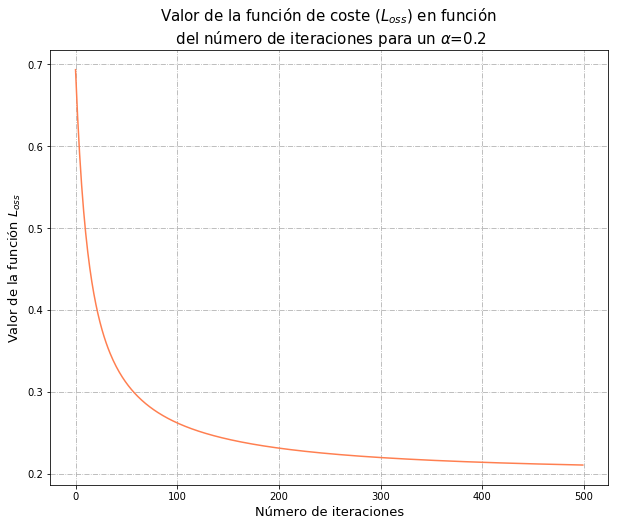

In [442]:
plt.figure(figsize=(10, 8))

plt.plot(f_coste_valores_02, 
         color = 'Coral')

plt.xlabel('Número de iteraciones', 
           size = 13)

plt.ylabel('Valor de la función $L_{oss}$',
           size = 13)

plt.title('Valor de la función de coste $(L_{oss})$ en función \n del número de iteraciones para un $\\alpha$=0.2', 
          size = 15)

plt.grid(ls = '-.')

Si mantenemos el valor de $\alpha = 0.2$ y cambiamos el número de iteraciones a 1000:

In [417]:
valores_optim, f_coste_valores_02 = descenso_gradiente(x, y, valores_iniciales, 0.2, 1000)

print('El valor que obtenemos para esos parámetros es: ', round(f_coste_valores_02[-1], 7))

El valor que obtenemos para esos parámetros es:  0.2049147


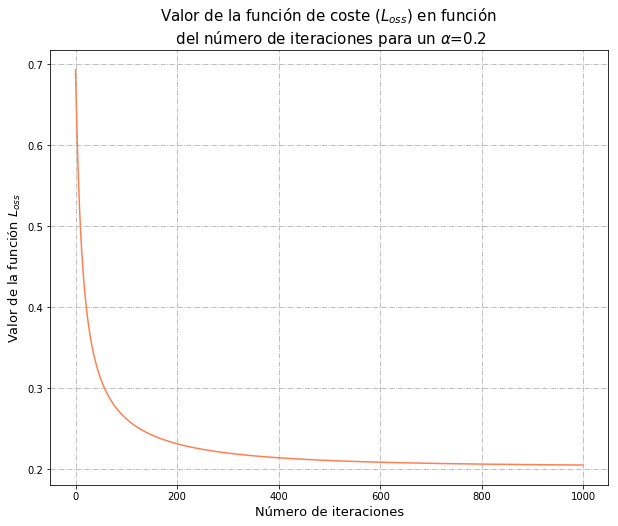

In [418]:
plt.figure(figsize=(10, 8))

plt.plot(f_coste_valores_02, 
         color = 'Coral')

plt.xlabel('Número de iteraciones', 
           size = 13)

plt.ylabel('Valor de la función $L_{oss}$', 
           size = 13)

plt.title('Valor de la función de coste $(L_{oss})$ en función \n del número de iteraciones para un $\\alpha$=0.2', 
          size = 15)

plt.grid(ls = '-.')

Podemos comprobar qué ocurre si cambiamos a un $\alpha = 0.8$ y mantenemos las 500 iteraciones: 

In [452]:
valores_iniciales = np.zeros(n_new) 

#Tienen que tener dimensión igual al número de columnas de x, que habíamos definido antes como n.

valores_iniciales = valores_iniciales.reshape(n_new, 1)

In [447]:
valores_optim, f_coste_valores_08 = descenso_gradiente(x, y, valores_iniciales, 0.8, 500)

print('El valor que obtenemos para esos parámetros es: ', round(f_coste_valores_optim[-1], 7))

El valor que obtenemos para esos parámetros es:  0.203601


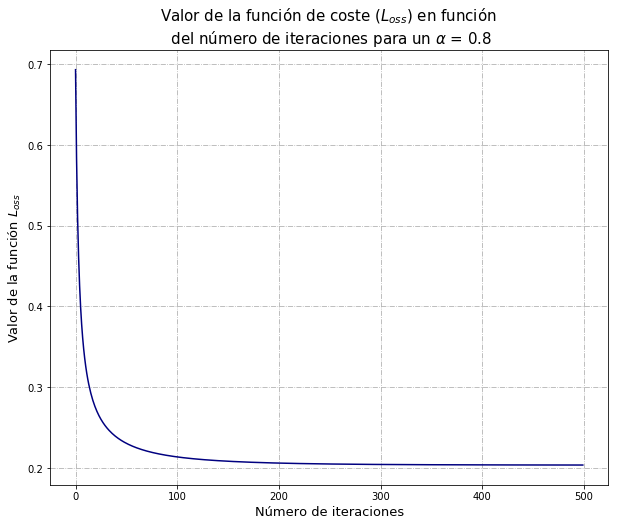

In [422]:
plt.figure(figsize=(10, 8))

plt.plot(f_coste_valores_08, 
         color = 'Navy')

plt.xlabel('Número de iteraciones', 
           size = 13)

plt.ylabel('Valor de la función $L_{oss}$', 
           size = 13)

plt.title('Valor de la función de coste $(L_{oss})$ en función \n del número de iteraciones para un $\\alpha$ = 0.8', 
          size = 15)

plt.grid(ls = '-.')

Si le pedimos 1000 iteraciones, manteniendo el valor de $\alpha = 0.8$:

In [424]:
valores_optim, f_coste_valores_08 = descenso_gradiente(x, y, valores_iniciales, 0.8, 200)

print('El valor que obtenemos para esos parámetros es: ', round(f_coste_valores_optim[-1], 7))

El valor que obtenemos para esos parámetros es:  0.203601


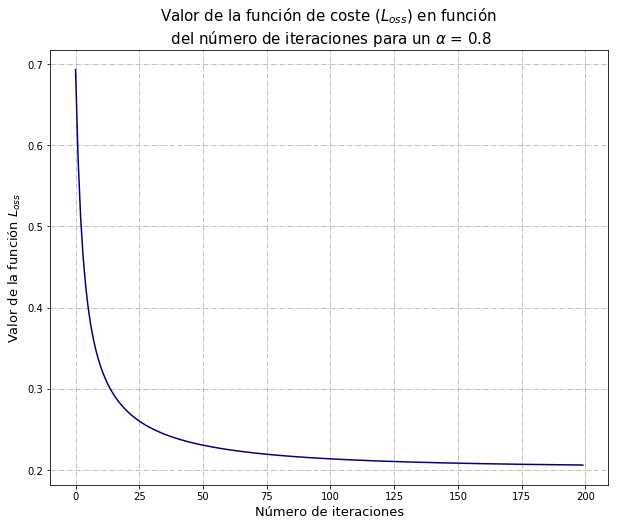

In [425]:
plt.figure(figsize=(10, 8))

plt.plot(f_coste_valores_08, 
         color = 'Navy')

plt.xlabel('Número de iteraciones', 
           size = 13)

plt.ylabel('Valor de la función $L_{oss}$', 
           size = 13)

plt.title('Valor de la función de coste $(L_{oss})$ en función \n del número de iteraciones para un $\\alpha$ = 0.8', 
          size = 15)

plt.grid(ls = '-.')

Como vemos, la caída es bastante más rápida en el caso de $\alpha = 0.8$ que en el caso de $\alpha = 0.2$. Esto se debe a que la tasa de aprendizaje es mayor, por lo que el gradiente se va ejecutando en pasos mayores y necesita menos iteraciones para encontrar el mínimo. 

En el caso de  $\alpha = 0.8$ solo necesitamos 200 iteraciones para alcanzar el mínimo, mientras que en el caso de  $\alpha = 0.2$ necesitábamos más de 500. 

A la vista de los números del mínimo de la función de coste también se aprecia cómo el caso de $\alpha = 0.8$ presenta un valor (ligeramente) menor al caso de $\alpha = 0.2$. 

Por último, probaré con los casos de $\alpha = 1.0$ (valor máximo que puede tomar la tasa) para ver si cambia con respecto al caso anterior. 

In [426]:
valores_optim, f_coste_valores_1 = descenso_gradiente(x, y, valores_iniciales, 1.0, 200)

print('El valor que obtenemos para esos parámetros es: ', round(f_coste_valores_optim[-1], 7))

El valor que obtenemos para esos parámetros es:  0.203601


Como se aprecia, el valor no cambia en los 7 primeros decimales, por lo que consideraremos que el resultado mostrado con el parámetro $\alpha = 0.8 $ es considerablemente bueno. 

### Representación de la función de coste para diferentes valores de $\alpha$ y 500 iteraciones

In [458]:
valores_optim_01_500, f_coste_valores_01_500 = descenso_gradiente(x, y, np.zeros(n_new).reshape(n_new, 1), 0.1, 500)

valores_optim_02_500, f_coste_valores_02_500 = descenso_gradiente(x, y, np.zeros(n_new).reshape(n_new, 1), 0.2, 500)
valores_optim_03_500, f_coste_valores_03_500 = descenso_gradiente(x, y, np.zeros(n_new).reshape(n_new, 1), 0.3, 500)
valores_optim_04_500, f_coste_valores_04_500 = descenso_gradiente(x, y, np.zeros(n_new).reshape(n_new, 1), 0.4, 500)
valores_optim_05_500, f_coste_valores_05_500 = descenso_gradiente(x, y, np.zeros(n_new).reshape(n_new, 1), 0.5, 500)
valores_optim_06_500, f_coste_valores_06_500 = descenso_gradiente(x, y, np.zeros(n_new).reshape(n_new, 1), 0.6, 500)
valores_optim_07_500, f_coste_valores_07_500 = descenso_gradiente(x, y, np.zeros(n_new).reshape(n_new, 1), 0.7, 500)
valores_optim_08_500, f_coste_valores_08_500 = descenso_gradiente(x, y, np.zeros(n_new).reshape(n_new, 1), 0.8, 500)
valores_optim_09_500, f_coste_valores_09_500 = descenso_gradiente(x, y, np.zeros(n_new).reshape(n_new, 1), 0.9, 500)
valores_optim_1_500, f_coste_valores_1_500 = descenso_gradiente(x, y, np.zeros(n_new).reshape(n_new, 1), 1.0, 500)

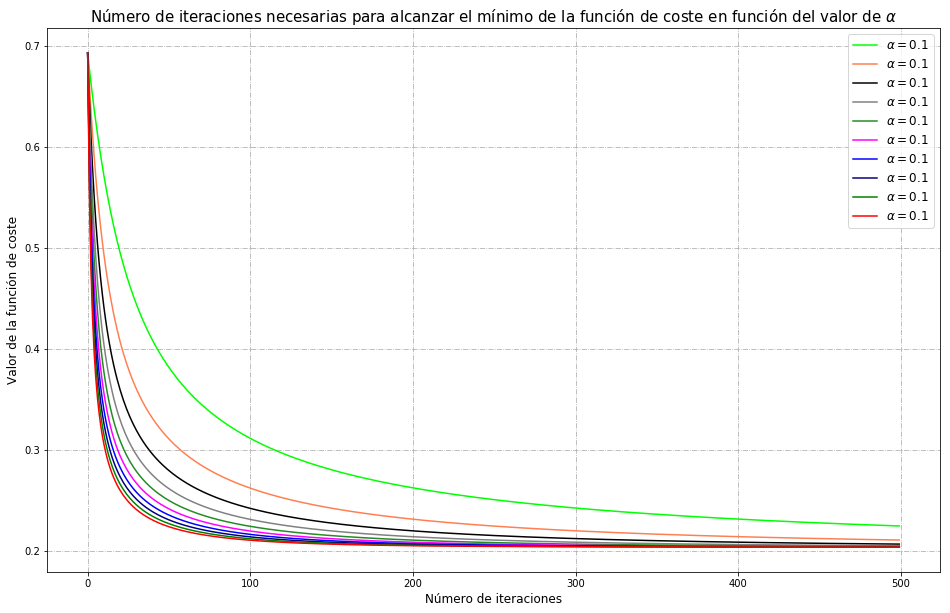

In [476]:
plt.figure(figsize=(16, 10))

plt.plot(f_coste_valores_01_500, 
         color = 'Lime', label = '$\\alpha = 0.1$')
plt.plot(f_coste_valores_02_500, 
         color = 'Coral', label = '$\\alpha = 0.1$')
plt.plot(f_coste_valores_03_500, 
         color = 'black', label = '$\\alpha = 0.1$')
plt.plot(f_coste_valores_04_500, 
         color = 'grey', label = '$\\alpha = 0.1$')
plt.plot(f_coste_valores_05_500, 
         color = 'forestgreen', label = '$\\alpha = 0.1$')
plt.plot(f_coste_valores_06_500, 
         color = 'magenta', label = '$\\alpha = 0.1$')
plt.plot(f_coste_valores_07_500, 
         color = 'blue', label = '$\\alpha = 0.1$')
plt.plot(f_coste_valores_08_500, 
         color = 'Navy', label = '$\\alpha = 0.1$')
plt.plot(f_coste_valores_09_500, 
         color = 'Green', label = '$\\alpha = 0.1$')
plt.plot(f_coste_valores_1_500, 
         color = 'red', label = '$\\alpha = 0.1$')
plt.grid(ls = '-.')
plt.xlabel('Número de iteraciones', size = 12)
plt.ylabel('Valor de la función de coste', size = 12)
plt.title('Número de iteraciones necesarias para alcanzar el mínimo de la función de coste en función del valor de $\\alpha$', 
          size = 15)
plt.legend(fontsize = 12);

Como comentaba anteriormente, se aprecia que a medida que el valor de $\alpha$ crece, el número de iteraciones necesario para encontrar el mínimo de la función de coste disminuye.